In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 이터레이터 (Iterator)

이터레이터: 데이터를 차례대로 꺼낼 수 있도록 해주는 객체

# 반복 가능한 객체 (iterable)

리스트, 셋, 딕셔너리, 문자열 등

In [0]:
dir([1, 2, 3])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [0]:
[1, 2, 3].__iter__()    # 이터레이터 객체

In [0]:
it = [1, 2, 3].__iter__()

In [0]:
it.__next__()

1

In [0]:
it.__next__()

2

In [0]:
it.__next__()    # 하나씩 꺼낸다

3

In [0]:
it.__next__()    # 더 꺼낼 것이 없으므로 오류가 난다

StopIteration: ignored

In [0]:
it = range(3).__iter__()
it.__next__()

0

## 간단한 이터레이터 만들기

In [0]:
# class 이터레이터명:
#   def __iter__(self):
#     코드
#   def __next__(self):
#     코드

class Counter:    # 붕어빵 기계 = 클래스, 붕어빵 = 객체
  def __init__(self, stop):
    self.cur = 0    # 현재 붕어빵 번호
    self.stop = stop    # 붕어빵 굽기 종료 시점
  def __iter__(self):
    return self
  def __next__(self):
    if self.cur < self.stop:
      r = self.cur
      self.cur += 1
      return r
    else:
      raise StopIteration

In [0]:
for i in Counter(3):
  print(i)

0
1
2


In [0]:
a, b, c = Counter(3)
c

2

# 제너레이터 (Generator)

제너레이터: 이터레이터를 생성해주는 함수. yield 키워드를 사용하여 생성 (함수에서 yield를 쓰면 해당 함수는 generator가 된다).

In [0]:
def num_gen():
  yield 1
  yield 2
  yield 3

In [0]:
for i in num_gen():
  print(i)    # 1, 2, 3 출력

1
2
3


In [0]:
# 변수 = next(제너레이터 객체)
g = num_gen()
g

<generator object num_gen at 0x7f55ebce5fc0>

In [0]:
next(g)

1

In [0]:
next(g)

2

In [0]:
next(g)

3

In [0]:
next(g)

StopIteration: ignored

In [0]:
def myGen():
  i = 0
  while True:
    i += 1
    yield i

In [0]:
for i in myGen():
  print(i)
  if i>5:
    break

1
2
3
4
5
6


# 이미지 데이터로 Convolutional layer 만들고 이미지 데이터 증식시키기

## CNN 모델 만드는 과정
1. 문제 정의
2. 데이터 수집
3. 모델 생성
4. 학습
5. 평가

### 문제 정의

다중 분류 문제. 입력: 도형 이미지, 출력: 각 도형에 대한 확률.

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator

### 데이터 수집

데이터가 부족한 경우 데이터를 생성할 수 있다. -> keras의 ImageDataGenerator를 사용해서 데이터를 증식시키고, 이미지 파일을 학습시킬 수 있다. (https://keras.io/preprocessing/image/#imagedatagenerator-methods)

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)    # rescale: 자동으로 스케일링 해준다
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
train_gen = train_datagen.flow_from_directory(
    "/content/drive/My Drive/190000 멀티캠퍼스/Data/handwriting_shape/train",
    target_size=(24, 24),
    class_mode="categorical",
    batch_size=3
)

test_gen = test_datagen.flow_from_directory(
    "/content/drive/My Drive/190000 멀티캠퍼스/Data/handwriting_shape/test",
    target_size=(24, 24),
    class_mode="categorical",
    batch_size=3
)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [0]:
type(train_gen)    # generator 이다

keras_preprocessing.image.directory_iterator.DirectoryIterator

### 모델 생성
1. conv layer: 입력 (24x24), 채널(3), 필터(3x3), 필터 개수(32), 활성화(relu)
2. pooling: 크기(2x2)
3. flatten
4. dense layer: 출력(128), 활성화(relu)
5. dense layer: 출력(3), 활성화(softmax)

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
_________________________________________________________________


### 학습

In [53]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

W0820 02:57:03.064419 140007608518528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 02:57:03.109614 140007608518528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



#### keras에서의 학습
그간 keras 모델을 학습시킬때는 fit 함수를 사용했다.

하지만 generator로 생성된 데이터를 학습시킬때는 fit_generator를 사용해야 한다.

In [54]:
model.fit_generator(
    train_gen,
    steps_per_epoch=(45/3),    # 1에폭은 45개, batch는 3개, 그러므로 steps_per_epoch은 45/3 = 15개
    epochs=100,
    validation_data=test_gen,
    validation_steps=5
)

W0820 03:05:48.525940 140007608518528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 03:05:48.597934 140007608518528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
15/15 [==============================] - 4s 296ms/step - loss: 1.0393 - acc: 0.5111 - val_loss: 0.7020 - val_acc: 0.6000
Epoch 2/100
15/15 [==============================] - 0s 32ms/step - loss: 0.4121 - acc: 0.8667 - val_loss: 0.2670 - val_acc: 1.0000
Epoch 3/100
15/15 [==============================] - 0s 30ms/step - loss: 0.1444 - acc: 0.9556 - val_loss: 0.1150 - val_acc: 0.9333
Epoch 4/100
15/15 [==============================] - 0s 30ms/step - loss: 0.0640 - acc: 0.9778 - val_loss: 0.1009 - val_acc: 0.9333
Epoch 5/100
15/15 [==============================] - 0s 30ms/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.0317 - val_acc: 1.0000
Epoch 6/100
15/15 [==============================] - 0s 31ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0259 - val_acc: 1.0000
Epoch 7/100
15/15 [==============================] - 0s 30ms/step - loss: 6.8945e-04 - acc: 1.0000 - val_loss: 0.0275 - val_acc: 1.0000
Epoch 8/100
15/15 [==============================] - 0s 31ms/step - los

### 평가

모델 평가 함수: evaluate_generator()

In [62]:
scores = model.evaluate_generator(test_gen, steps=5)
# print(model.metrics_names[1], scores[1]*100)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 100.00%


In [64]:
# 예측 결과를 클래스 벡터로 표현
output = model.predict_generator(test_gen, steps=5)
np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})    # print 했을 때 결과물을 보기 쉽게 하기 위해
print(test_gen.class_indices)
print(output)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.205 0.717 0.079]
 [1.000 0.000 0.000]
 [0.000 0.011 0.989]
 [0.991 0.000 0.009]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]]


# 데이터 증식

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.preprocessing import image

In [0]:
data_aug_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=(0.2, 3.0),    # 원본 이미지 80%~120% 크기 (랜덤)
    fill_mode="nearest",
    vertical_flip=True,
    shear_range=0.1
)

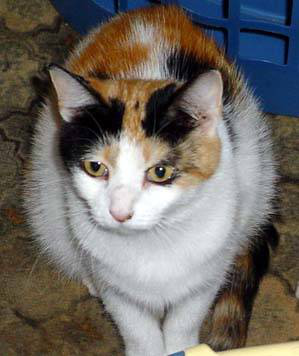

In [89]:
img = load_img("/content/drive/My Drive/190000 멀티캠퍼스/Data/dogs-vs-cats/train/cat.111.jpg")
img

In [90]:
img_to_array(img)

array([[[94.000, 84.000, 57.000],
        [90.000, 80.000, 53.000],
        [86.000, 76.000, 49.000],
        ...,
        [19.000, 59.000, 111.000],
        [18.000, 59.000, 113.000],
        [17.000, 60.000, 115.000]],

       [[95.000, 83.000, 57.000],
        [90.000, 80.000, 53.000],
        [86.000, 76.000, 49.000],
        ...,
        [19.000, 59.000, 111.000],
        [17.000, 60.000, 113.000],
        [17.000, 60.000, 115.000]],

       [[94.000, 83.000, 55.000],
        [91.000, 80.000, 52.000],
        [87.000, 78.000, 49.000],
        ...,
        [18.000, 58.000, 110.000],
        [16.000, 59.000, 114.000],
        [16.000, 59.000, 114.000]],

       ...,

       [[78.000, 61.000, 45.000],
        [75.000, 59.000, 43.000],
        [72.000, 64.000, 43.000],
        ...,
        [250.000, 244.000, 186.000],
        [250.000, 244.000, 186.000],
        [250.000, 244.000, 186.000]],

       [[75.000, 58.000, 42.000],
        [72.000, 56.000, 40.000],
        [69.000, 61.000, 

In [91]:
np.shape(img)

(356, 299, 3)

In [92]:
x = img_to_array(img)    # (356, 299, 3)
x = x.reshape((1,) + x.shape)
np.shape(x)

(1, 356, 299, 3)

In [0]:
# 가짜 이미지 50개 생성
i = 0
for data in data_aug_gen.flow(x, 
                              batch_size=1, 
                              save_to_dir="/content/drive/My Drive/190000 멀티캠퍼스/Data/dogs-vs-cats", 
                              save_format="png", 
                              save_prefix="sample"):
  i += 1
  if i > 50:
    break